In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install numpy
#!pip install librosa
!pip install tensorflow tensorflow_hub
!pip install ipywidgets

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import PIL.Image
from PIL import Image
import soundfile
import os

from glob import glob

import librosa
import IPython.display as ipd

import tensorflow as tf
import tensorflow_hub as hub
import requests
from io import BytesIO

## Read Audio Files


In [ ]:
audio_files = glob('Desktop/Audio/short-monster-scream-105026.mp3')
#/Desktop/Audio/startup-87026.mp3


#Playing an audio file using IPython.display
ipd.Audio(audio_files[0])

## Convert to Spectrogram

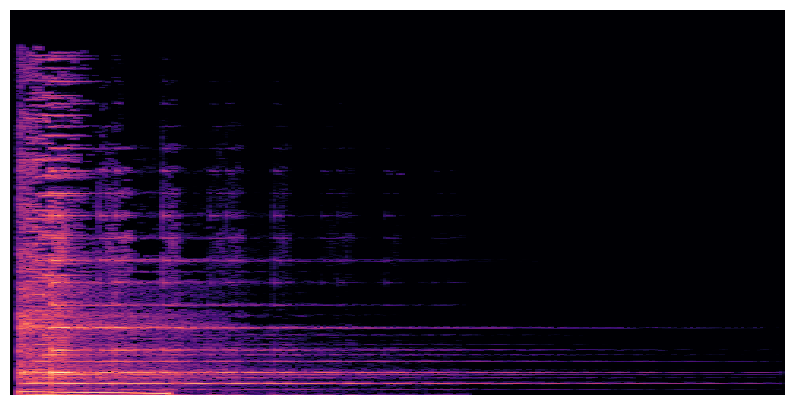

In [ ]:
# Function to convert audio to spectrogram
def audio_to_spectrogram(file_path, save_image=True):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Compute Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)

    # Convert amplitude to decibels (log scale)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Plot the spectrogram without labels
    plt.figure(figsize=(10, 5))
    plt.axis('off')  # Remove axis
    librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None)

    # Save the spectrogram as an image
    if save_image:
        plt.savefig(file_path.replace(".mp3", "_spectrogram.png"), bbox_inches='tight', pad_inches=0)

    # Show the spectrogram
    plt.show()

# Convert the audio file to a spectrogram
for file in audio_files:
    audio_to_spectrogram(file)


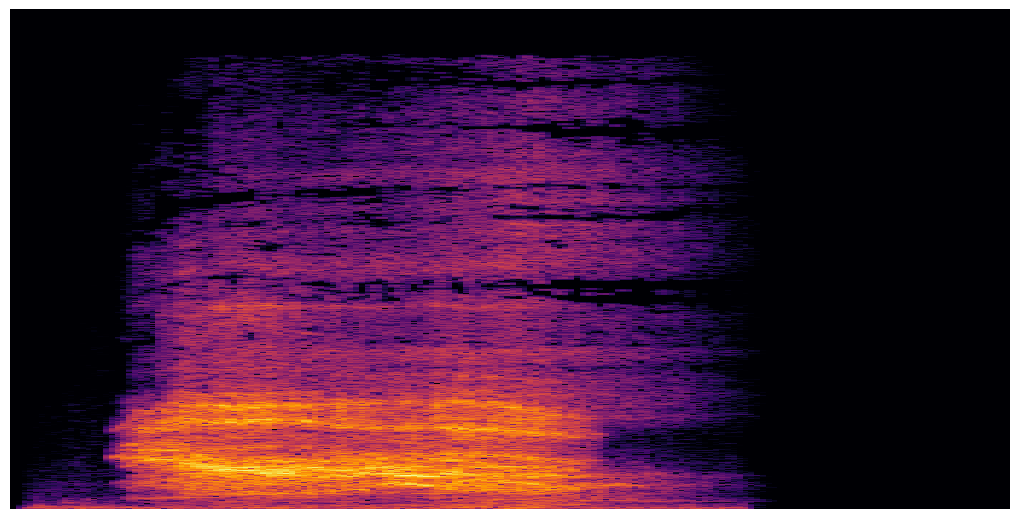

Spectrogram saved as RGB image: Desktop/Audio/short-monster-scream-105026_spectrogram.png


<Figure size 640x480 with 0 Axes>

In [ ]:
def audio_to_spectrogram(file_path, save_image=True):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Compute Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)

    # Convert amplitude to decibels (log scale)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Create a figure without axis
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_axis_off()
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Display spectrogram
    librosa.display.specshow(S_db, sr=sr, cmap='inferno')

    # Show the spectrogram before saving
    plt.show()

    # Save spectrogram as a high-quality PNG image
    img_path = file_path.replace(".mp3", "_spectrogram.png")
    if save_image:
        plt.savefig(img_path, dpi=300, bbox_inches='tight', pad_inches=0)

    plt.close(fig)  # Close plot to free memory

    # Convert to RGB format using PIL
    img = Image.open(img_path).convert("RGB")
    img.save(img_path)  # Overwrite with RGB format

    print(f"Spectrogram saved as RGB image: {img_path}")

# Convert the audio files to spectrogram images
for file in audio_files:
    audio_to_spectrogram(file)


## Spectrogram to Art

In [ ]:
def load_image(image_path, image_size=(256, 256)):
    # Load image from path and resize
    img = PIL.Image.open(image_path)
    img = img.resize(image_size)
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def show_image(image, title=''):
    # Remove batch dimension and display image
    image = np.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
content_image_path = 'Desktop/Audio/short-monster-scream-105026_spectrogram.png'
style_image_path = 'Desktop/Paintings/StarrtNight.jpg'

content_image = load_image(content_image_path)
style_image = load_image(style_image_path)

In [ ]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
content_image = tf.constant(content_image, dtype=tf.float32)
style_image = tf.constant(style_image, dtype=tf.float32)

stylized_image = hub_model(content_image, style_image)[0]

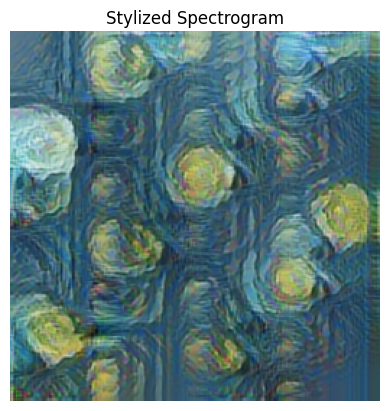

In [ ]:
show_image(stylized_image, title='Stylized Spectrogram')

# Testing Menu

Dropdown(description='Style:', options=('Starry Night', 'The Scream', 'The Great Wave', 'Impression, Sunrise',…

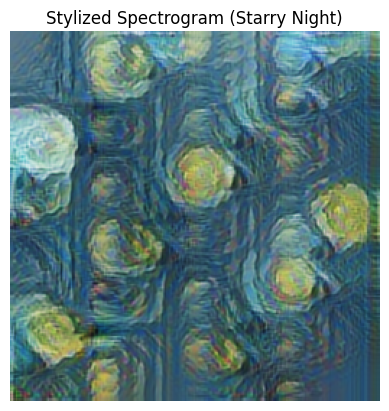

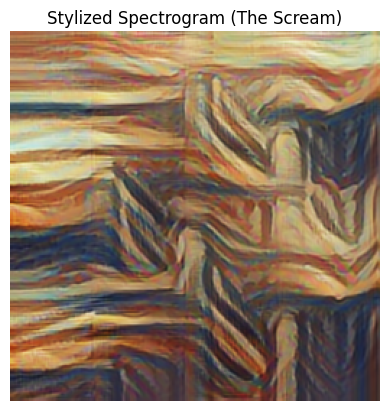

In [3]:
# Define available styles
style_images = {
    "Starry Night": "Desktop/Paintings/StarryNight.jpg",
    "The Scream": "Desktop/Paintings/Scream.jpg",
    "The Great Wave": "Desktop/Paintings/Wave.jpg",
    "Impression, Sunrise": "Desktop/Paintings/Sunrise.jpg",
    "Persistence of Memory": "Desktop/Paintings/PersistenceofMemory.jpg",
}

# Load Image Function
def load_image(image_path, image_size=(256, 256)):
    img = PIL.Image.open(image_path)
    img = img.resize(image_size)
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Show Image Function
def show_image(image, title=''):
    image = np.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load content image
content_image_path = "Desktop/Audio/short-monster-scream-105026_spectrogram.png"
content_image = load_image(content_image_path)

# Load style transfer model
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Dropdown menu
style_dropdown = widgets.Dropdown(
    options=style_images.keys(),
    description='Style:',
    disabled=False,
)

# Function to apply NST
def apply_style(change):
    style_name = style_dropdown.value
    style_image_path = style_images[style_name]
    style_image = load_image(style_image_path)

    stylized_image = hub_model(tf.constant(content_image, dtype=tf.float32),
                               tf.constant(style_image, dtype=tf.float32))[0]

    show_image(stylized_image, title=f'Stylized Spectrogram ({style_name})')

# Trigger style application when dropdown changes
style_dropdown.observe(apply_style, names='value')

# Display dropdown
display(style_dropdown)

# Apply default style on launch
apply_style(None)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Dropdown(description='Style:', options=('Starry Night', 'The Scream', 'The Great Wave', 'Impression, Sunrise',…

C:\Users\RyRyN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


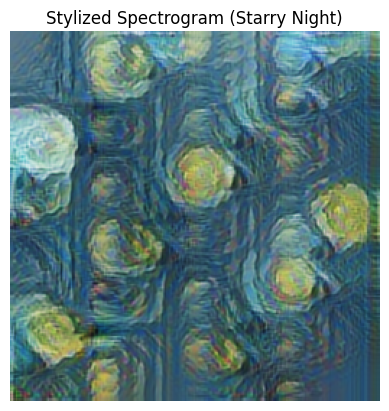

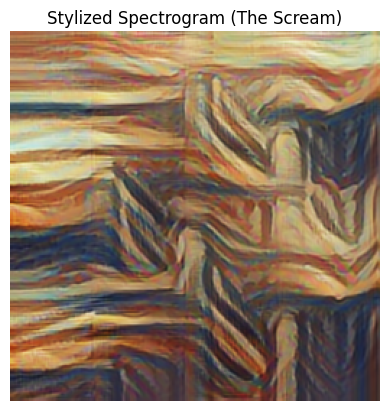

In [4]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
import ipywidgets as widgets
from IPython.display import display

# Load the VGG19 model with pretrained weights
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
vgg.trainable = False

# Define available styles
style_images = {
    "Starry Night": "Desktop/Paintings/StarryNight.jpg",
    "The Scream": "Desktop/Paintings/Scream.jpg",
    "The Great Wave": "Desktop/Paintings/Wave.jpg",
    "Impression, Sunrise": "Desktop/Paintings/Sunrise.jpg",
    "Persistence of Memory": "Desktop/Paintings/PersistenceofMemory.jpg",
}

# Load image function
def load_image(image_path, image_size=(256, 256)):
    img = PIL.Image.open(image_path)
    img = img.resize(image_size)
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Show image function
def show_image(image, title=''):
    image = np.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Define content and style layers
content_layers = ['block5_conv2']
style_layers = [
    'block1_conv1',
    'block2_conv1',
    'block3_conv1',
    'block4_conv1',
    'block5_conv1'
]

# Create a model to extract features from selected layers
def vgg_layers(layer_names):
    model_outputs = [vgg.get_layer(name).output for name in layer_names]
    return tf.keras.Model([vgg.input], model_outputs)

# Function to compute the Gram matrix for style features
def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    num_locations = tf.cast(tf.shape(input_tensor)[1] * tf.shape(input_tensor)[2], tf.float32)
    return result / num_locations

# Function to extract content and style features
def get_feature_representations(model, content_image, style_image):
    content_outputs = model(tf.constant(content_image))
    style_outputs = model(tf.constant(style_image))

    # Separate style and content features
    content_features = {content_layers[0]: content_outputs[len(style_layers)]}
    style_features = {style_layers[i]: gram_matrix(style_outputs[i]) for i in range(len(style_layers))}

    return content_features, style_features

# Load content image
content_image_path = "Desktop/Audio/short-monster-scream-105026_spectrogram.png"
content_image = load_image(content_image_path)

# Create a feature extractor model
feature_extractor = vgg_layers(style_layers + content_layers)

# Load style transfer model (optional for direct stylization)
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Dropdown menu for style selection
style_dropdown = widgets.Dropdown(
    options=style_images.keys(),
    description='Style:',
    disabled=False,
)

# Function to apply NST using extracted features
def apply_style(change):
    style_name = style_dropdown.value
    style_image_path = style_images[style_name]
    style_image = load_image(style_image_path)

    # Extract content and style features
    content_features, style_features = get_feature_representations(feature_extractor, content_image, style_image)

    # Apply Neural Style Transfer (NST) using TensorFlow Hub model
    stylized_image = hub_model(tf.constant(content_image, dtype=tf.float32),
                               tf.constant(style_image, dtype=tf.float32))[0]

    # Display the final stylized image
    show_image(stylized_image, title=f'Stylized Spectrogram ({style_name})')

# Trigger style application when dropdown changes
style_dropdown.observe(apply_style, names='value')

# Display dropdown
display(style_dropdown)

# Apply default style on launch
apply_style(None)


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
import ipywidgets as widgets
from IPython.display import display

# Define available styles
style_images = {
    "Starry Night": "Desktop/Paintings/StarryNight.jpg",
    "The Scream": "Desktop/Paintings/Scream.jpg",
    "The Great Wave": "Desktop/Paintings/Wave.jpg",
    "Impression, Sunrise": "Desktop/Paintings/Sunrise.jpg",
    "Persistence of Memory": "Desktop/Paintings/PersistenceofMemory.jpg",
}

# Load Image Function
def load_image(image_path, image_size=(512, 512)):  # Increased resolution for better brushstrokes
    img = PIL.Image.open(image_path)
    img = img.resize(image_size)
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Show Image Function
def show_image(image, title=''):
    image = np.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load content image
content_image_path = "Desktop/Audio/short-monster-scream-105026_spectrogram.png"
content_image = load_image(content_image_path)

# Load TensorFlow Hub NST model
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Dropdown menu for style selection
style_dropdown = widgets.Dropdown(
    options=style_images.keys(),
    description='Style:',
    disabled=False,
)

# Slider for style strength
style_strength_slider = widgets.FloatSlider(
    value=0.8,  # Default balance: 80% style, 20% content
    min=0.0,
    max=1.0,
    step=0.05,
    description='Style Strength:',
)

# Function to apply NST with controlled style strength
def apply_style(change):
    style_name = style_dropdown.value
    style_image_path = style_images[style_name]
    style_image = load_image(style_image_path)

    # Get style strength value
    style_strength = style_strength_slider.value

    # Apply NST
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

    # Blend original content with styled image based on strength
    blended_image = (1 - style_strength) * content_image + style_strength * stylized_image

    # Show final stylized image
    show_image(blended_image.numpy(), title=f'Stylized Spectrogram ({style_name}) - Strength: {style_strength}')

# Trigger style application when dropdown or slider changes
style_dropdown.observe(apply_style, names='value')
style_strength_slider.observe(apply_style, names='value')

# Display UI controls
display(style_dropdown, style_strength_slider)

# Apply default style on launch
apply_style(None)

Dropdown(description='Style:', options=('Starry Night', 'The Scream', 'The Great Wave', 'Impression, Sunrise',…